In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime

pd.set_option('display.max_columns', None)

In [2]:
df_full_cv = pd.read_csv('full_cv.csv')
df_mini_cv = pd.read_csv('mini_cv.csv')
df_ad = pd.read_csv('13020-ad.csv')

df_mini_cv['updated_date'] = df_mini_cv['updated_date'].astype('datetime64')
df_ad['inserted_date'] = df_ad['inserted_date'].astype('datetime64')
df_full_cv['updated_date'] = df_full_cv['updated_date'].astype('datetime64')
df_full_cv['created_date'] = df_full_cv['created_date'].astype('datetime64')
df_ad['inserted_date_month'] = df_ad['inserted_date'].dt.month
df_mini_cv['updated_date_month'] = df_mini_cv['updated_date'].dt.month

**df_ad**: trích từ bảng chotot_job.ad với cate 13020 từ Jan 01 đến May 31 2021 <br>
*have_mini_cv*: account đó cũng submit mini cv (1: có, 0: không)

In [3]:
df_ad.rename(columns = {'have_cv_mini' : 'have_mini_cv'}, inplace = True)
df_ad

,ad_id,account_id,city_name,district_name,inserted_date,have_mini_cv,have_full_cv,inserted_date_month
0,114979023,18082567,Đà Nẵng,Quận Hải Châu,2021-01-01,0,0,1
1,114979322,3039703,Hải Phòng,Huyện An Dương,2021-01-01,0,0,1
2,114979967,4114166,Long An,Huyện Đức Hòa,2021-01-01,0,0,1
3,114980024,5272665,Tp Hồ Chí Minh,Quận 9,2021-01-01,0,0,1
4,114980040,15705627,Tp Hồ Chí Minh,Quận 12,2021-01-01,0,0,1
...,...,...,...,...,...,...,...,...
57241,121237408,20683216,Bình Dương,Thị xã Tân Uyên,2021-05-31,0,0,5
57242,121237468,19640125,Tp Hồ Chí Minh,Quận 7,2021-05-31,0,0,5
57243,121237556,20640919,Tp Hồ Chí Minh,Quận 12,2021-05-31,0,0,5
57244,121237590,16243882,Tp Hồ Chí Minh,Quận 10,2021-05-31,0,0,5


**df_mini_cv**: trích từ bảng chotot_job.cv từ Jan 01 đến May 31 2021 khi user submit nộp hồ sơ ứng tuyển <br>
*use_ad*: account đó cũng sử dụng ad (1: có, 0: không)

In [4]:
df_mini_cv

,cv_id,account_id,list_id,created_date,updated_date,use_ad,have_full_cv,updated_date_month
0,11212,10765522,80507361,2/10/2021,2021-02-10,0,0,2
1,11213,4182112,82270152,2/10/2021,2021-02-10,0,0,2
2,11214,15945168,82595251,2/10/2021,2021-02-10,0,0,2
3,11221,2409885,82603104,2/10/2021,2021-02-10,0,0,2
4,11222,13562097,82400474,2/10/2021,2021-02-10,0,0,2
...,...,...,...,...,...,...,...,...
109506,121044,1340176,86278221,5/31/2021,2021-05-31,1,0,5
109507,121045,9705442,86183826,5/31/2021,2021-05-31,0,0,5
109508,121046,347730,86175074,5/31/2021,2021-05-31,1,0,5
109509,121047,10835792,86127237,5/31/2021,2021-05-31,0,0,5


In [5]:
df_full_cv

,cv_id,account_id,list_id,created_date,updated_date,use_ad,have_mini_cv
0,10216,18888459,NaN,2021-01-01,2021-01-01,0,0
1,10217,10377400,NaN,2021-01-01,2021-01-01,0,0
2,10218,9709490,NaN,2021-01-01,2021-01-01,0,0
3,10219,14437673,NaN,2021-01-01,2021-01-01,0,0
4,10220,18931723,NaN,2021-01-01,2021-01-01,0,0
...,...,...,...,...,...,...,...
1291,120517,20702912,NaN,2021-05-31,2021-05-31,0,0
1292,120603,20645916,NaN,2021-05-31,2021-05-31,0,0
1293,120865,326690,NaN,2021-05-31,2021-05-31,0,0
1294,120935,3250302,NaN,2021-05-31,2021-05-31,1,1


## Thống kê sơ lược từ Jan 01, 2021 - May 31, 2021
### Số lượng full và mini CV và ad inerted (đã được approved)

In [6]:
print("Tổng lượt nộp CV mini: %d" %df_mini_cv.shape[0])
print("Tổng lượt up ad và đc approve: %d" %df_ad.shape[0])
print("Tổng số tạo mới full CV: %d" %df_full_cv.shape[0])

Tổng lượt nộp CV mini: 109511
Tổng lượt up ad và đc approve: 57246
Tổng số tạo mới full CV: 1296


In [7]:
df_ad.dtypes

ad_id                           int64
account_id                      int64
city_name                      object
district_name                  object
inserted_date          datetime64[ns]
have_mini_cv                    int64
have_full_cv                    int64
inserted_date_month             int64
dtype: object

### Thống kê về users

In [8]:
#remove duplicate, chỉ có tạo mới, và giữ lại ngày đầu tiên tạo
df_ad_no_dup = df_ad.drop_duplicates(subset = ['account_id'])
df_mini_cv_no_dup = df_mini_cv.drop_duplicates(subset = ['account_id'])

num_acc_mini_cv = df_mini_cv_no_dup.shape[0]
num_acc_ad = df_ad_no_dup.shape[0]

rate_ad_in_cv = df_mini_cv_no_dup['use_ad'].mean() * 100
rate_mini_cv_in_ad = df_ad_no_dup['have_mini_cv'].mean() * 100

num_mini_cv_per_acc = df_mini_cv.shape[0]/num_acc_mini_cv
num_ad_per_acc = df_ad.shape[0]/num_acc_ad

total_ad_or_mini_cv = num_acc_mini_cv + num_acc_ad - df_mini_cv_no_dup['use_ad'].sum()
rate_ad_and_mini_cv = 100 * df_mini_cv_no_dup['use_ad'].sum() / total_ad_or_mini_cv

print("Số user submit mini CV: %d" %num_acc_mini_cv)
print("Số user dùng ad: %d" %num_acc_ad)
print("Số user dùng cả 2: %d" %df_mini_cv_no_dup['use_ad'].sum())
print("--")
print("Trung bình 1 users có submit mini CV sẽ submit %.2f lần" %num_mini_cv_per_acc)
print("Trung bình 1 users up ad sẽ up %.2f lần" %num_ad_per_acc)
print("--")
print("Phần trăm số user cũng up ad trong số những user submit mini cv: %.2f%%" %rate_ad_in_cv)
print("Phần trăm số user cũng submit mini cv trong số những user up ad: %.2f%%" %rate_mini_cv_in_ad)
print("Phần trăm số users vừa up ad vừa use mini cv trong tổng số %d user đc record là %.2f%%" %(total_ad_or_mini_cv, rate_ad_and_mini_cv))

Số user submit mini CV: 46621
Số user dùng ad: 30959
Số user dùng cả 2: 3547
--
Trung bình 1 users có submit mini CV sẽ submit 2.35 lần
Trung bình 1 users up ad sẽ up 1.85 lần
--
Phần trăm số user cũng up ad trong số những user submit mini cv: 7.61%
Phần trăm số user cũng submit mini cv trong số những user up ad: 11.46%
Phần trăm số users vừa up ad vừa use mini cv trong tổng số 74033 user đc record là 4.79%


### Top 10 account submit mini CV nhiều nhất

In [9]:
df_count_mini_cv_per_id = df_mini_cv.groupby('account_id')['cv_id'].count().reset_index().sort_values(by = ['cv_id'], ascending = False).reset_index()
df_count_mini_cv_per_id.rename(columns={'cv_id': "num_cv_updated"}, inplace=True)
df_count_mini_cv_per_id.head(10)

,index,account_id,num_cv_updated
0,3993,4330821,147
1,16404,17076231,138
2,39685,19843699,133
3,43972,20222038,130
4,7215,10423750,122
5,3897,4241196,122
6,30151,19521771,112
7,3474,3816916,108
8,4495,4844773,104
9,37901,19782327,98


In [10]:
num_mini_cv_under_5= df_count_mini_cv_per_id[(df_count_mini_cv_per_id['num_cv_updated'] <= 5)].shape[0]
print("Số người submit mini cv không quá 5 lần: %d, chiếm %.2f%%" %(num_mini_cv_under_5, 100*num_mini_cv_under_5/df_count_mini_cv_per_id.shape[0]))

Số người submit mini cv không quá 5 lần: 43165, chiếm 92.59%


**Comment**
> Tuy hơn 90% số người dùng CV update CV không quá 5 lần, nhưng vẫn còn tồn tại nhiều account update CV tới 147 lần, có 8 account update CV trên 100 lần ?!?

### Tỉ lệ users theo số lần update CV (Top 5)

In [11]:
df_thongke_mini_cv_id = df_count_mini_cv_per_id.groupby('num_cv_updated')['account_id'].count().reset_index()
df_thongke_mini_cv_id['proportion (%)'] = round(100* df_thongke_mini_cv_id['account_id'] / df_mini_cv_no_dup.shape[0],2)
df_thongke_mini_cv_id = df_thongke_mini_cv_id.head()
display(df_thongke_mini_cv_id)



,num_cv_updated,account_id,proportion (%)
0,1,28507,61.15
1,2,7975,17.11
2,3,3610,7.74
3,4,1955,4.19
4,5,1118,2.40


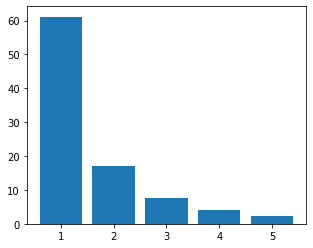

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize = (5,4))
plt.bar(df_thongke_mini_cv_id['num_cv_updated'], df_thongke_mini_cv_id['proportion (%)'])
plt.show()
# plt.savefig("charts/ti_le_users_theo_so_lan_update_cv.jpg")

> Số lương users chỉ update CV 1 lần chiếm hơn 60%, bỏ xa số lượng update 2 lần (gấp 4 lần), và càng nhiều lần update cv số lượng trên tiếp tục giảm mạnh

### Top 10 account insert ad nhiều nhất

In [15]:
df_count_ad_per_id = df_ad.groupby('account_id')['ad_id'].count().reset_index().sort_values(by = ['ad_id'], ascending = False).reset_index()
df_count_ad_per_id.rename(columns={'ad_id':'num_ad_inserted'}, inplace=True)
df_count_ad_per_id.head(10)


,index,account_id,num_ad_inserted
0,23351,18954436,353
1,18919,17369278,329
2,21015,18274648,271
3,17669,16807534,259
4,10932,12323702,217
5,16226,16018726,169
6,25181,19245345,136
7,2211,2019662,122
8,1437,1253611,98
9,883,775510,97


In [16]:
num_ad_under_5= df_count_ad_per_id[(df_count_ad_per_id['num_ad_inserted'] <= 5)].shape[0]
print("Số người up ad không quá 5 lần: %d, chiếm %.2f%%" %(num_ad_under_5, 100*num_ad_under_5/df_count_ad_per_id.shape[0]))

Số người up ad không quá 5 lần: 29944, chiếm 96.72%


> Lần này, tỉ lệ không quá 5 ad tận 96.72%, nhưng vẫn tồn tại nhiều acc_id có số ad tạo tới 353 ad (tức là trung bình mỗi ngày người đó tạo hơn 2 ad)

### Tỉ lệ users theo số lần insert ad (Top 5)

,num_ad_inserted,account_id,proportion (%)
0,1,21057,68.02
1,2,5489,17.73
2,3,1985,6.41
3,4,915,2.96
4,5,498,1.61


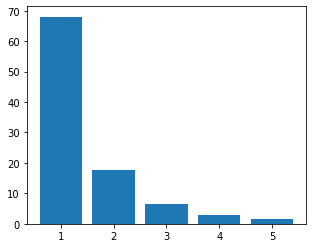

In [17]:
plt.figure(figsize = (5,4))
df_thongke_ad_id = df_count_ad_per_id.groupby('num_ad_inserted')['account_id'].count().reset_index()
df_thongke_ad_id['proportion (%)'] = round(100* df_thongke_ad_id['account_id'] / df_ad_no_dup.shape[0],2)
df_thongke_ad_id = df_thongke_ad_id.head()
display(df_thongke_ad_id)
plt.bar(df_thongke_ad_id['num_ad_inserted'], df_thongke_ad_id['proportion (%)'])
plt.show()

> Tương tự với cv user, nhưng trung bình chung về số ad được tạo thấp hơn cv

## Xu hướng thay đổi qua các ngày, các tháng
### Tính theo số CV updated và số ad inserted

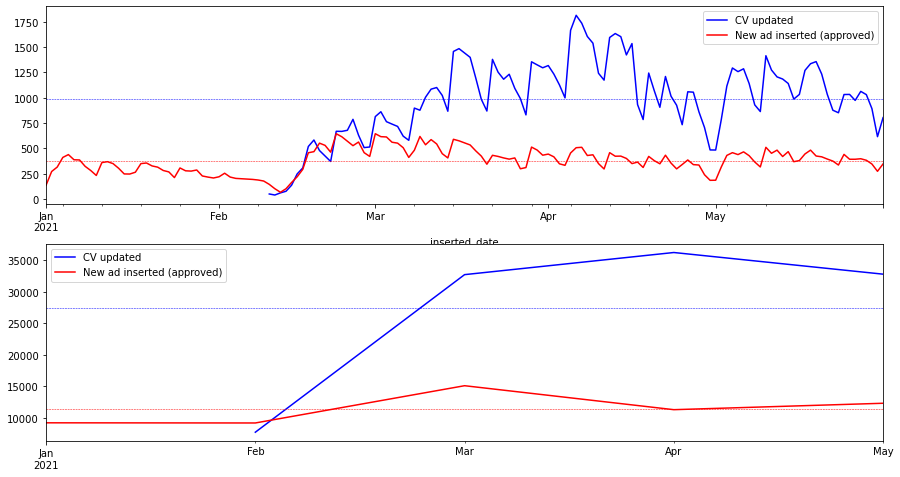

In [18]:
#Trend mỗi loại theo day
df_mini_cv_by_day = df_mini_cv.groupby('updated_date').agg({'account_id': 'count', 'use_ad': 'mean'})
df_mini_cv_by_day.columns = ['num_cv_updated', 'rate_use_ad']

df_ad_by_day = df_ad.groupby('inserted_date').agg({'inserted_date': 'count', 'have_mini_cv': 'mean'})
df_ad_by_day.columns = ['num_ad', 'rate_use_ad']

#Trend mỗi loại theo month
df_mini_cv_by_month = df_mini_cv.resample('M', on="updated_date").agg({'account_id': 'count', 'use_ad': 'mean'})
df_mini_cv_by_month.columns = ['num_cv_updated', 'rate_use_ad']

df_ad_by_month = df_ad.resample('M', on = "inserted_date").agg({'inserted_date': 'count', 'have_mini_cv': 'mean'})
df_ad_by_month.columns = ['num_ad', 'rate_use_ad']

#Plot
f,a = plt.subplots(2,1,figsize = (15,8))
df_mini_cv_by_day['num_cv_updated'].plot(kind = 'line', label = "CV updated", color = "blue", ax = a[0])
df_ad_by_day['num_ad'].plot(kind = 'line', label = "New ad inserted (approved)", color = "red", ax = a[0])
a[0].axhline(df_mini_cv_by_day['num_cv_updated'].mean(), linestyle = "--", color = "blue", linewidth = "0.5")
a[0].axhline(df_ad_by_day['num_ad'].mean(), linestyle = "--", color = "red", linewidth = "0.5")
a[0].legend()

df_mini_cv_by_month['num_cv_updated'].plot(kind = 'line', label = "CV updated", color = "blue", ax = a[1])
df_ad_by_month['num_ad'].plot(kind = 'line', label = "New ad inserted (approved)", color = "red", ax = a[1])
a[1].axhline(df_mini_cv_by_month['num_cv_updated'].mean(), linestyle = "--", color = "blue", linewidth = "0.5")
a[1].axhline(df_ad_by_month['num_ad'].mean(), linestyle = "--", color = "red", linewidth = "0.5")
a[1].legend()

plt.xlabel("")
plt.ylabel("")

plt.show()

In [19]:
print(df_mini_cv_by_day['num_cv_updated'].mean())
print(df_ad_by_day['num_ad'].mean())
print(df_mini_cv_by_month['num_cv_updated'].mean())
print(df_ad_by_month['num_ad'].mean())

986.5855855855856
379.112582781457
27377.75
11449.2


**Comment**
> Về ad: trung bình có 330 ad được tạo mỗi ngày (gần 12000 ad mỗi tháng) và số ad được tạo qua các ngày không biến động nhiều, ngoại trừ trước tết ít ad và sau tết nhiều ad do nhu cầu cao, đỉnh ad theo ngày rơi vào tuần cuối tháng 2 (sau tết) và tháng 3 có nhiều ad được tạo nhất <br>
> Về CV: Data chỉ thống kê số submit sv từ Tết. Trung bình có 1000 mini cv được submit mỗi ngày (27500 cv mỗi tháng). Số mini CV được submit tăng liên tục đến khi lập đỉnh vào tuần thứ 2 tháng 4 với 1750 cv được update trong 1 ngày. Có vẻ do dịch nên sau đó số lượng cv update giảm nhẹ sau đỉnh đến nay.

### Tính theo số user sử dụng (lần đầu sử dụng)

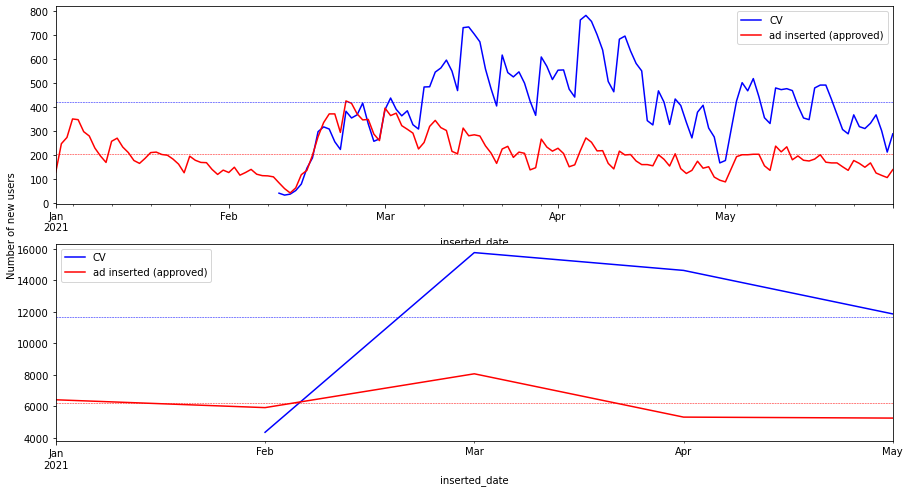

In [20]:
#Trend mỗi loại theo day
df_mini_cv_no_dup_by_day = df_mini_cv_no_dup.groupby('updated_date').agg({'account_id': 'count', 'use_ad': 'mean'})
df_mini_cv_no_dup_by_day.columns = ['num_cv_updated', 'rate_use_ad']

df_ad_no_dup_by_day = df_ad_no_dup.groupby('inserted_date').agg({'inserted_date': 'count', 'have_mini_cv': 'mean'})
df_ad_no_dup_by_day.columns = ['num_ad', 'rate_use_ad']

#Trend mỗi loại theo month
df_mini_cv_no_dup_by_month = df_mini_cv_no_dup.resample('M', on="updated_date").agg({'account_id': 'count', 'use_ad': 'mean'})
df_mini_cv_no_dup_by_month.columns = ['num_cv_updated', 'rate_use_ad']

df_ad_no_dup_by_month = df_ad_no_dup.resample('M', on = "inserted_date").agg({'inserted_date': 'count', 'have_mini_cv': 'mean'})
df_ad_no_dup_by_month.columns = ['num_ad', 'rate_use_ad']

#Plot
f,a = plt.subplots(2,1,figsize = (15,8))
df_mini_cv_no_dup_by_day['num_cv_updated'].plot(kind = 'line', label = "CV", color = "blue", ax = a[0])
df_ad_no_dup_by_day['num_ad'].plot(kind = 'line', label = "ad inserted (approved)", color = "red", ax = a[0])
a[0].axhline(df_mini_cv_no_dup_by_day['num_cv_updated'].mean(), linestyle = "--", color = "blue", linewidth = "0.5")
a[0].axhline(df_ad_no_dup_by_day['num_ad'].mean(), linestyle = "--", color = "red", linewidth = "0.5")
a[0].legend()

df_mini_cv_no_dup_by_month['num_cv_updated'].plot(kind = 'line', label = "CV", color = "blue", ax = a[1])
df_ad_no_dup_by_month['num_ad'].plot(kind = 'line', label = "ad inserted (approved)", color = "red", ax = a[1])
a[1].axhline(df_mini_cv_no_dup_by_month['num_cv_updated'].mean(), linestyle = "--", color = "blue", linewidth = "0.5")
a[1].axhline(df_ad_no_dup_by_month['num_ad'].mean(), linestyle = "--", color = "red", linewidth = "0.5")
a[1].legend()

f.text(0.08, 0.5, 'Number of new users', va='center', rotation='vertical')

plt.show()

In [21]:
print(df_mini_cv_no_dup_by_day['num_cv_updated'].mean())
print(df_ad_no_dup_by_day['num_ad'].mean())
print(df_mini_cv_no_dup_by_month['num_cv_updated'].mean())
print(df_ad_no_dup_by_month['num_ad'].mean())

420.009009009009
205.02649006622516
11655.25
6191.8


In [22]:
df_mini_cv_no_dup_monthly = df_mini_cv.drop_duplicates(subset=['account_id', 'updated_date_month']).groupby('updated_date_month').agg({'account_id': 'count', 'use_ad': 'mean'})
df_mini_cv_no_dup_monthly.columns = ['num_cv_updated', 'rate_use_ad']

df_ad_no_dup_monthly = df_ad.drop_duplicates(subset=['account_id', 'inserted_date_month']).groupby('inserted_date_month').agg({'account_id': 'count', 'have_mini_cv': 'mean'})
df_ad_no_dup_monthly.columns = ['num_ad', 'rate_use_ad']

**Comment**
> Sau khi lược bỏ các account_id trùng lặp (chỉ giữ lại lần đầu tạo mới và tính theo số users), trend không thay đổi nhiều so với thống kê theo số lần tạo, chỉ khác ở đỉnh user tạo mới CV dịch chuyển từ tháng 4 sang tháng 3 <br>
> Trung bình 1 ngày có 200 new users insert ad (6000 1 tháng) và 340 new users tạo CV (gần 12000 users 1 tháng)

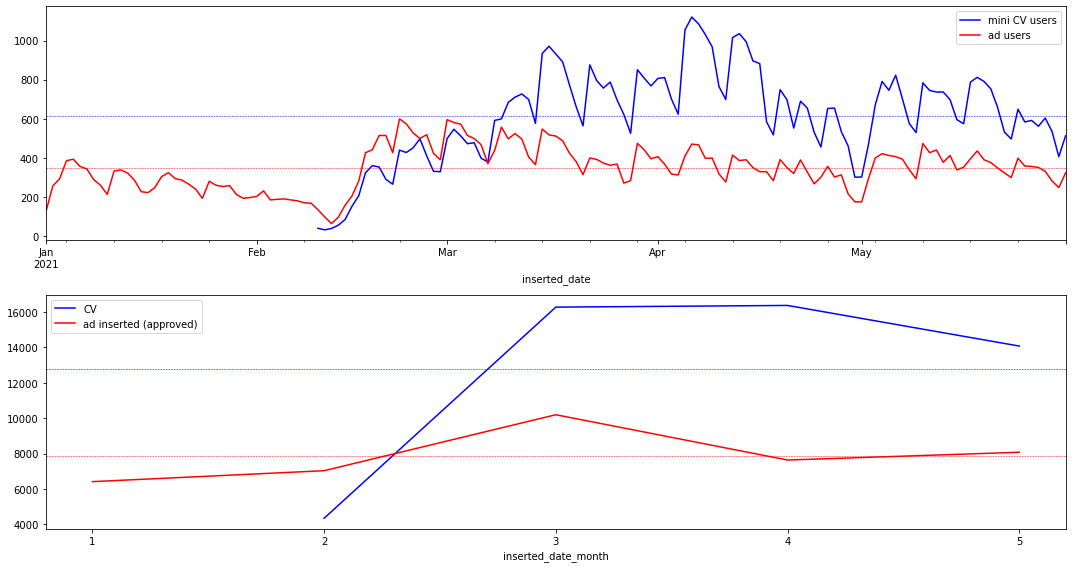

In [23]:
df_ad_no_dup_day = df_ad.drop_duplicates(subset=['account_id', 'inserted_date'])
df_mini_cv_no_dup_day = df_mini_cv.drop_duplicates(subset=['account_id', 'updated_date'])

#Trend mỗi loại theo day
df_mini_cv_no_dup_day_by_day = df_mini_cv_no_dup_day.groupby('updated_date').agg({'account_id': 'count', 'use_ad': 'mean'})
df_mini_cv_no_dup_day_by_day.columns = ['num_cv_updated', 'rate_use_ad']

df_ad_no_dup_day_by_day = df_ad_no_dup_day.groupby('inserted_date').agg({'inserted_date': 'count', 'have_mini_cv': 'mean'})
df_ad_no_dup_day_by_day.columns = ['num_ad', 'rate_use_ad']

#Plot
f,a = plt.subplots(2,1,figsize = (15,8))
df_mini_cv_no_dup_day_by_day['num_cv_updated'].plot(kind = 'line', label = "mini CV users", color = "blue", ax = a[0])
df_ad_no_dup_day_by_day['num_ad'].plot(kind = 'line', label = "ad users", color = "red", ax = a[0])
a[0].axhline(df_mini_cv_no_dup_day_by_day['num_cv_updated'].mean(), linestyle = "--", color = "blue", linewidth = "0.5")
a[0].axhline(df_ad_no_dup_day_by_day['num_ad'].mean(), linestyle = "--", color = "red", linewidth = "0.5")
a[0].legend()

df_mini_cv_no_dup_monthly['num_cv_updated'].plot(kind = 'line', label = "CV", color = "blue", ax = a[1])
df_ad_no_dup_monthly['num_ad'].plot(kind = 'line', label = "ad inserted (approved)", color = "red", ax = a[1])
a[1].axhline(df_mini_cv_no_dup_monthly['num_cv_updated'].mean(), linestyle = "--", color = "blue", linewidth = "0.5")
a[1].axhline(df_ad_no_dup_monthly['num_ad'].mean(), linestyle = "--", color = "red", linewidth = "0.5")
a[1].legend()
a[1].set_xticks([1,2,3,4,5])
plt.tight_layout()
plt.show()

In [24]:
print(df_mini_cv_no_dup_day_by_day['num_cv_updated'].mean())
print(df_ad_no_dup_day_by_day['num_ad'].mean())

print(df_mini_cv_no_dup_monthly['num_cv_updated'].mean())
print(df_ad_no_dup_monthly['num_ad'].mean())

617.0360360360361
347.64900662251654
12762.75
7869.6


### Users dùng cả CV lẫn AD

In [25]:
df_merge = pd.merge(df_ad_no_dup, df_mini_cv_no_dup, on = "account_id", how = "inner")
df_merge.head()

,ad_id,account_id,city_name,district_name,inserted_date,have_mini_cv,have_full_cv_x,inserted_date_month,cv_id,list_id,created_date,updated_date,use_ad,have_full_cv_y,updated_date_month
0,114980300,18805711,Tp Hồ Chí Minh,Quận 7,2021-01-01,1,0,1,35620,83394604,3/18/2021,2021-03-18,1,0,3
1,114980341,18436484,Tp Hồ Chí Minh,Quận 4,2021-01-01,1,0,1,16030,82857157,2/24/2021,2021-02-24,1,0,2
2,114982312,9225180,Tp Hồ Chí Minh,Quận 5,2021-01-01,1,0,1,83346,85081054,4/25/2021,2021-04-25,1,0,4
3,114985693,18888026,Bình Dương,Thành phố Thủ Dầu Một,2021-01-01,1,0,1,29889,83560867,3/13/2021,2021-03-13,1,0,3
4,114986430,18433342,Tp Hồ Chí Minh,Quận Gò Vấp,2021-01-01,1,1,1,66551,84600430,4/11/2021,2021-04-11,1,1,4


### Trong số những user dùng cả 2 (chỉ xét lần đầu với những user submit nhiều cv/up nhiều ad): 


In [26]:
df_merge['mini_cv_before_ad'] = df_merge.apply(lambda x: 1 if x['updated_date'] > x['inserted_date'] else 0, axis = 1)
df_merge['ad_before_mini_cv'] = df_merge.apply(lambda x: 1 if x['updated_date'] < x['inserted_date'] else 0, axis = 1)
df_merge['mini_cv_sameday_ad'] = df_merge.apply(lambda x: 1 if x['updated_date'] == x['inserted_date'] else 0, axis = 1)

print("Tỉ lệ user dùng mini_cv trước ad: %.2f%%" %(df_merge['mini_cv_before_ad'].mean()*100))
print("Tỉ lệ user dùng ad trước mini_cv: %.2f%%" %(df_merge['ad_before_mini_cv'].mean()*100))
print("Tỉ lệ user dùng mini_cv cùng ngày với ad: %.2f%%" %(df_merge['mini_cv_sameday_ad'].mean()*100))

Tỉ lệ user dùng mini_cv trước ad: 56.84%
Tỉ lệ user dùng ad trước mini_cv: 27.63%
Tỉ lệ user dùng mini_cv cùng ngày với ad: 15.53%


## Thống kê users theo vị trí địa lí (Inserted ad)
### Chia theo tỉnh

In [27]:
df_ad_top10 = df_ad_no_dup.groupby('city_name')['account_id'].count().reset_index().sort_values(by = ['account_id'], ascending = False).reset_index().head(10)
df_ad_top10

,index,city_name,account_id
0,50,Tp Hồ Chí Minh,19585
1,17,Hà Nội,2597
2,2,Bình Dương,1945
3,58,Đà Nẵng,1804
4,61,Đồng Nai,810
5,13,Cần Thơ,545
6,28,Long An,386
7,59,Đắk Lắk,341
8,1,Bà Rịa - Vũng Tàu,222
9,49,Tiền Giang,170


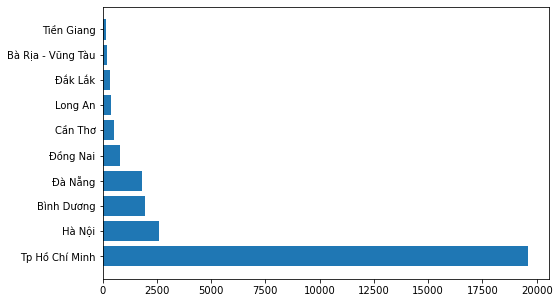

In [28]:
plt.figure(figsize = (8,5))
plt.barh(df_ad_top10['city_name'], df_ad_top10['account_id'])
plt.show()

**Comment**
> Đa số users tạo ad đến từ HCM (gần 2/3). Trong top 10, có 8 địa phương ở vùng Nam Bộ cùng với Hà Nội (rank 2) và Đà Nẵng (rank 4) <br>
> Số users đến từ HCM gấp 7.5 so với HN (rank 2) <br>
> Top 4 địa phương đứng đầu có sự tách top nhẹ so với phần còn lại <br>

### Chia theo các quận/huyện trong TPHCM

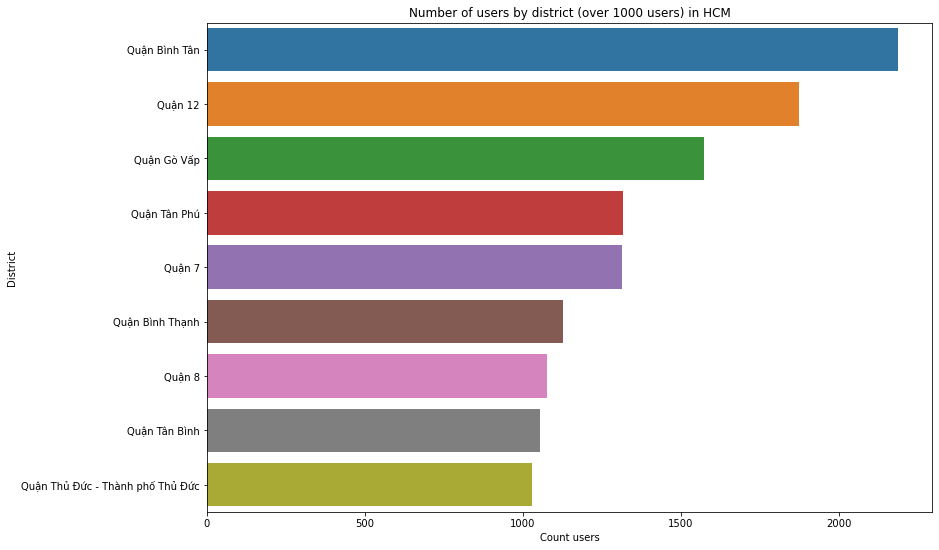

In [29]:
plt.figure(figsize = (13,9))
df_ad_no_dup_hcm = df_ad_no_dup[df_ad_no_dup['city_name'] == "Tp Hồ Chí Minh"]
sns.countplot(data = df_ad_no_dup_hcm, y = "district_name", order = df_ad_no_dup_hcm['district_name'].value_counts().iloc[:9].index)
plt.title("Number of users by district (over 1000 users) in HCM")
plt.xlabel("Count users")
plt.ylabel("District")
plt.show()

**Comment**
> Phần các user ở trên nửa đường tròn phía Tây thành phố, với các quận ngoại thành phía Tây (Bình Tân, Tân Phú), Tây Bắc (Q.12), Nam (Q.8, Q.7) <br>
> Bình Tân, Q12 và Gò Vấp là 3 quận có nhiều users nhất

## Thống kê giữa các lần up ad của 1 user (bỏ qua các lần up ad trong cùng 1 ngày)
### Giữa lần đầu và lần cuối up ad

In [30]:
df_ad_delta_id = df_ad.sort_values(['account_id','inserted_date']).groupby('account_id').agg({'inserted_date': ['min', 'max']})
df_ad_delta_id.columns = ['min_inserted_date', 'max_inserted_date']
df_ad_delta_id['delta'] = df_ad_delta_id['max_inserted_date'] - df_ad_delta_id['min_inserted_date']
df_ad_delta_id = df_ad_delta_id[df_ad_delta_id['delta'] != datetime.timedelta(days=0)]
df_ad_delta_id.sort_values(by = ['delta'], ascending = False, inplace = True)
df_ad_delta_id['delta_days'] = df_ad_delta_id['delta'].dt.days
df_ad_delta_id

,min_inserted_date,max_inserted_date,delta,delta_days
account_id,,,,
9762784,2021-01-02,2021-05-31,149 days,149
16018726,2021-01-02,2021-05-31,149 days,149
18737057,2021-01-02,2021-05-31,149 days,149
1190606,2021-01-01,2021-05-30,149 days,149
15679604,2021-01-03,2021-05-31,148 days,148
...,...,...,...,...
18290020,2021-04-16,2021-04-17,1 days,1
18290725,2021-03-10,2021-03-11,1 days,1
4942402,2021-03-09,2021-03-10,1 days,1


C:\Users\pvtha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


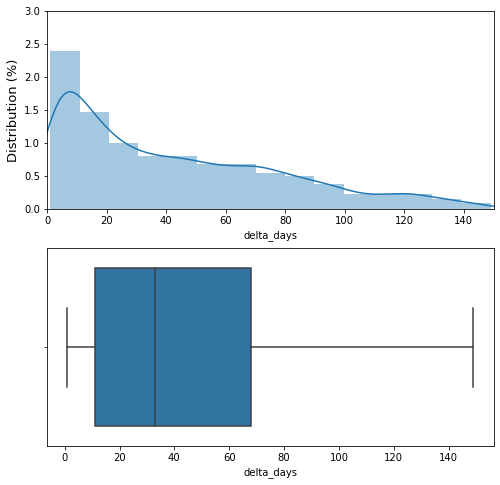

In [31]:
f, a = plt.subplots(2,1, figsize = (8,8))

sns.distplot(df_ad_delta_id['delta_days'], bins = 15, ax = a[0])
a[0].set_xlim(0, 150)
a[0].set_yticks(a[0].get_yticks())
a[0].set_yticklabels((a[0].get_yticks() * 100))
a[0].set_ylabel('Distribution (%)', fontsize=13)

sns.boxplot(data = df_ad_delta_id, x = 'delta_days', ax = a[1])
plt.show()

In [32]:
a[0].get_yticks() * 100

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ])

**Comment**
> Khoảng thời gian giữa lần đầu và lần cuối tạo ad tập trung nhiều nhất ở khoảng từ 1 đến 5 ngày <br>
> 50% khoảng thời giain trên rơi vào từ 10 đến 70 ngày, trung vị khoảng 33 ngày

### Gap giữa 2 lần up ad liên tiếp của mỗi user (lấy trung bình các gap và bỏ các ad up cùng ngày)

In [33]:
df_ad_sort = df_ad.sort_values(['account_id','inserted_date'])
df_ad_sort['pre_date'] = df_ad_sort.groupby('account_id')['inserted_date'].shift()
df_ad_sort['slack'] = df_ad_sort['inserted_date'] - df_ad_sort['pre_date']
df_ad_sort.dropna(subset=['slack'], axis = 0, inplace = True)
df_ad_sort['slack_days'] = df_ad_sort['slack'].dt.days
df_ad_sort = df_ad_sort[df_ad_sort['slack_days'] != 0]
df_ad_slack_id = df_ad_sort.groupby('account_id')['slack_days'].mean().reset_index()
df_ad_slack_id.sort_values(by = ['slack_days'], ascending = False, inplace = True)
df_ad_slack_id = df_ad_slack_id[df_ad_slack_id['slack_days'] != 0]
df_ad_slack_id


,account_id,slack_days
1316,4519229,144.0
4691,15993881,144.0
4239,15085951,144.0
1744,8901805,143.0
2397,10720477,141.0
...,...,...
5501,17286743,1.0
549,1917871,1.0
6067,18068202,1.0
3878,14230932,1.0


C:\Users\pvtha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


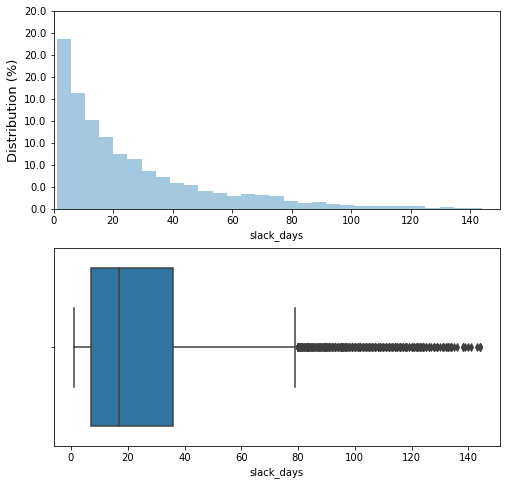

In [34]:
f, a = plt.subplots(2,1, figsize = (8,8))

sns.distplot(df_ad_slack_id['slack_days'], bins = 30, ax = a[0], kde = False)
a[0].set_xlim(0, 150)
a[0].set_yticks(a[0].get_yticks())
a[0].set_yticklabels(100* np.round(a[0].get_yticks() / df_ad_slack_id.shape[0],1))
a[0].set_ylabel('Distribution (%)', fontsize=13)

sns.boxplot(data = df_ad_slack_id, x = 'slack_days', ax = a[1])
plt.show()

In [35]:
df_ad_slack_id.groupby('slack_days')['account_id'].count()

slack_days
1.000000      372
1.062500        2
1.125000        2
1.134615        1
1.148148        1
             ... 
139.000000      1
140.000000      1
141.000000      1
143.000000      1
144.000000      3
Name: account_id, Length: 760, dtype: int64

**Comment**
> Khoảng thời gian giữa 2 lần liên tiếp tạo ad tập trung nhiều nhất ở khoảng từ 1 đến 10 ngày <br>
> 50% khoảng thời gian trên rơi vào từ 8 đến 38 ngày, trung vị khoảng 18 ngày <br>
> SỐ liệu có nhiều outliers (từ 80 tới 150 ngày) do data phân bố rải rác trên range lớn <br>

### Về full CV

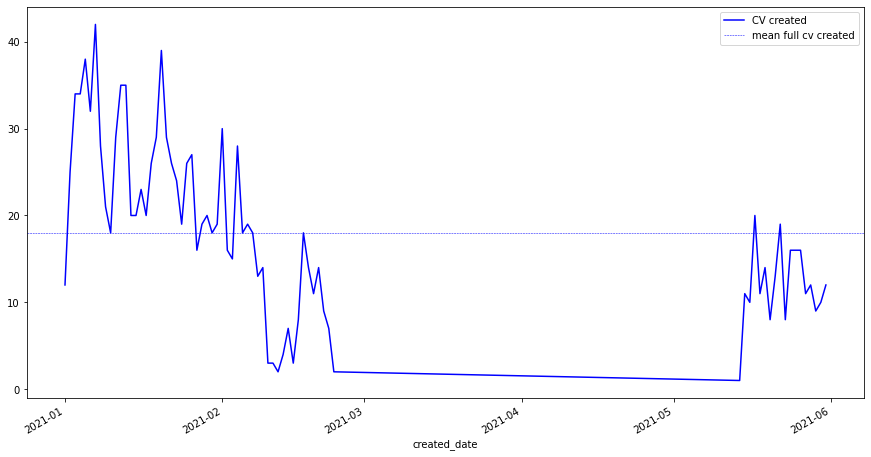

In [36]:
#Trend theo day
df_full_cv_by_day = df_full_cv.groupby('created_date').agg({'account_id': 'count'})
df_full_cv_by_day.columns = ['num_cv_created']

#Trend mỗi loại theo month
df_full_cv_by_month = df_full_cv.resample('M', on="created_date").agg({'account_id': 'count'})
df_full_cv_by_month.columns = ['num_cv_created']

#Plot
f,a = plt.subplots(1,1,figsize = (15,8))
df_full_cv_by_day['num_cv_created'].plot(kind = 'line', label = "CV created", color = "blue", ax = a)
a.axhline(df_full_cv_by_day['num_cv_created'].mean(), linestyle = "--", color = "blue", linewidth = "0.5", label = "mean full cv created")
a.legend()

plt.show()

**Comment**
> Do có gần 3 tháng k thống kê nên em chịu

In [37]:
rate_ad_in_full_cv = 100* df_full_cv['use_ad'].mean()
rate_mini_cv_in_full_cv = 100* df_full_cv['have_mini_cv'].mean()

print("Trong số những user có tạo full cv: ")
print("Tỉ lệ user có up ad: %.2f%%" %rate_ad_in_full_cv)
print("Tỉ lệ user có submit mini cv: %.2f%%" %rate_mini_cv_in_full_cv)

Trong số những user có tạo full cv: 
Tỉ lệ user có up ad: 23.61%
Tỉ lệ user có submit mini cv: 9.26%


In [38]:
df_full_cv['gap_updated_created'] = df_full_cv['updated_date'] - df_full_cv['created_date']
df_full_cv['gap_updated_created_day'] = df_full_cv['gap_updated_created'].dt.days
df_updated_full_cv = df_full_cv[df_full_cv['gap_updated_created_day'] != 0]
num_updated_full_cv = df_updated_full_cv.shape[0]

print("Có %d, chiếm %.2f%% user có chỉnh sửa cv" %(num_updated_full_cv, 100*num_updated_full_cv/df_full_cv.shape[0]))

Có 68, chiếm 5.25% user có chỉnh sửa cv


C:\Users\pvtha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


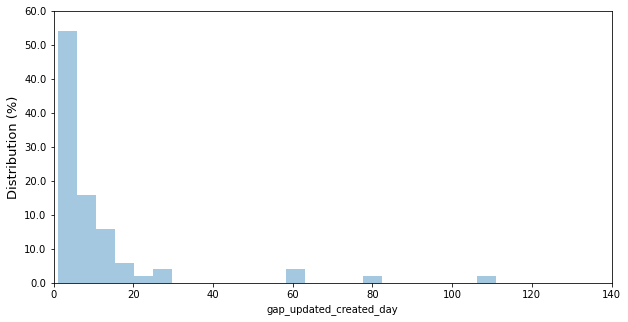

In [39]:
f, a = plt.subplots(1,1,figsize=(10,5))
sns.distplot(df_updated_full_cv['gap_updated_created_day'], bins = 23, ax = a, kde = False)
a.set_xlim(0,140)
a.set_yticks(a.get_yticks())
a.set_yticklabels( 100 * np.round(a.get_yticks() /df_updated_full_cv.shape[0],1))
a.set_ylabel('Distribution (%)', fontsize=13)
plt.show()

In [40]:
df_ad_no_dup_hcm.groupby('district_name')['account_id'].count()

district_name
Huyện Bình Chánh                     862
Huyện Cần Giờ                          7
Huyện Củ Chi                         350
Huyện Hóc Môn                        900
Huyện Nhà Bè                         210
Quận 1                               578
Quận 10                              509
Quận 11                              356
Quận 12                             1873
Quận 2                               100
Quận 2 - Thành phố Thủ Đức           335
Quận 3                               273
Quận 4                               280
Quận 5                               302
Quận 6                               504
Quận 7                              1314
Quận 8                              1075
Quận 9                               177
Quận 9 - Thành phố Thủ Đức           796
Quận Bình Thạnh                     1126
Quận Bình Tân                       2186
Quận Gò Vấp                         1573
Quận Phú Nhuận                       254
Quận Thủ Đức                         245
Qu

In [41]:
df_num_mini_cv_id = df_mini_cv.groupby(['account_id', 'updated_date'])['cv_id'].count().reset_index()
df_num_mini_cv_id = df_num_mini_cv_id.sort_values(by = ['account_id', 'cv_id'], ascending = False).groupby('account_id').head(1)
df_num_mini_cv_id

,account_id,updated_date,cv_id
68490,20708651,2021-05-31,1
68489,20708555,2021-05-31,2
68488,20708138,2021-05-31,1
68487,20707737,2021-05-31,1
68486,20707571,2021-05-31,1
...,...,...,...
5,8367,2021-05-25,1
4,7964,2021-03-09,1
3,7240,2021-05-18,1
1,485,2021-03-19,1


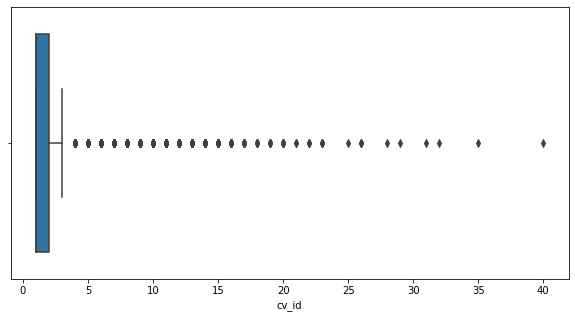

In [42]:
plt.figure(figsize=(10,5))
sns.boxplot(data = df_num_mini_cv_id, x = 'cv_id')
plt.show()